<a href="https://colab.research.google.com/github/AdryanoPitanga/Data-analysis/blob/main/COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ESTUDO ESTATISTICO A RESPEITO DA COVID 19 DE 2020 ATÉ 2021 DE CAMPINAS E GUARULHOS

## Fonte dos dados
https://github.com/seade-R/dados-covid-sp

###Importação dos dados

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
covid = pd.read_csv('/content/drive/MyDrive/Dados Python/covid_sp_tratado.csv',sep=';', encoding = 'utf-8')

In [ ]:
covid['casos_mm7d'] = covid['casos_mm7d'].apply(lambda x: x.replace(',','.'))
covid['casos_mm7d'] = covid['casos_mm7d'].astype(float)

In [ ]:
covid = covid.drop(columns = ['nome_ra','nome_drs','latitude','longitude','codigo_ibge'])

In [ ]:
covid.dtypes

,0
indice,int64
município,object
dia,int64
mes,int64
data,object
casos,int64
casos_novos,int64
casos_pc,float64
casos_mm7d,float64
obitos,int64


In [ ]:
covid.head()

,indice,município,dia,mes,data,casos,casos_novos,casos_pc,casos_mm7d,obitos,obitos_novos,obitos_pc,obitos_mm7d,letalidade,pop,pop_60,area,semana_epidem,densidade
0,1,Adamantina,25,2,2020-02-25,0,0,0.0,0.0,0,0,0.0,0.0,0.0,33894,7398,411.99,9,82.268987
1,2,Adolfo,25,2,2020-02-25,0,0,0.0,0.0,0,0,0.0,0.0,0.0,3447,761,211.06,9,16.331849
2,3,Aguaí,25,2,2020-02-25,0,0,0.0,0.0,0,0,0.0,0.0,0.0,35608,5245,474.55,9,75.035297
3,4,Águas da Prata,25,2,2020-02-25,0,0,0.0,0.0,0,0,0.0,0.0,0.0,7797,1729,142.67,9,54.650592
4,5,Águas de Lindóia,25,2,2020-02-25,0,0,0.0,0.0,0,0,0.0,0.0,0.0,18374,3275,60.13,9,305.571262


In [ ]:
covid.shape

(373455, 19)

In [ ]:
covid_campinas = covid.loc[covid.município == 'Campinas']
covid_guarulhos = covid.loc[covid.município == 'Guarulhos']

In [ ]:
#Criação de coluna com a porcentagem de idosos
covid_campinas['porcentagem_idosos'] = 100*covid_campinas['pop_60'] / covid_campinas['pop']

<ipython-input-9-80fb65e70877>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_campinas['porcentagem_idosos'] = 100*covid_campinas['pop_60'] / covid_campinas['pop']


In [ ]:
covid_guarulhos.head()

,indice,município,dia,mes,data,casos,casos_novos,casos_pc,casos_mm7d,obitos,obitos_novos,obitos_pc,obitos_mm7d,letalidade,pop,pop_60,area,semana_epidem,densidade
212,213,Guarulhos,25,2,2020-02-25,0,0,0.0,0.0,0,0,0.0,0.0,0.0,1351275,162662,318.68,9,4240.225304
857,858,Guarulhos,26,2,2020-02-26,0,0,0.0,0.0,0,0,0.0,0.0,0.0,1351275,162662,318.68,9,4240.225304
1502,1503,Guarulhos,27,2,2020-02-27,0,0,0.0,0.0,0,0,0.0,0.0,0.0,1351275,162662,318.68,9,4240.225304
2147,2148,Guarulhos,28,2,2020-02-28,0,0,0.0,0.0,0,0,0.0,0.0,0.0,1351275,162662,318.68,9,4240.225304
2792,2793,Guarulhos,29,2,2020-02-29,0,0,0.0,0.0,0,0,0.0,0.0,0.0,1351275,162662,318.68,9,4240.225304


### Campinas

Medidas

In [ ]:
covid_campinas['obitos_novos'].mean()

7.721934369602764

In [ ]:
covid_campinas['casos_novos'].mean()

194.88946459412782

In [ ]:
covid_campinas['obitos_novos'].median()

5.0

In [ ]:
covid_campinas['casos_novos'].median()

148.0

In [ ]:
covid_campinas['dia'].mode()

,dia
0,25


### Guarulhos

Medidas

In [ ]:
round(covid_guarulhos['obitos_novos'].mean(),3)

8.404

In [ ]:
round(covid_guarulhos['casos_novos'].mean(),3)

109.496

In [ ]:
covid_guarulhos['casos_novos'].median()

87.0

In [ ]:
covid_guarulhos['obitos_novos'].median()

4.0

In [ ]:
covid_guarulhos['dia'].mode()

,dia
0,25


### Descrição Geral

In [ ]:
covid_campinas.describe()

,indice,dia,mes,casos,casos_novos,casos_pc,casos_mm7d,obitos,obitos_novos,obitos_pc,obitos_mm7d,letalidade,pop,pop_60,area,semana_epidem,densidade,porcentagem_idosos
count,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.0,579.0,5.790000e+02,579.000000,5.790000e+02,5.790000e+02
mean,186514.000000,15.737478,6.269430,46549.331606,194.889465,3959.956785,194.434986,1763.333333,7.721934,150.006962,7.698988,0.036734,1175501.0,192796.0,7.945700e+02,25.792746,1.479418e+03,1.640118e+01
std,107900.229958,8.803909,3.024688,36212.354082,173.933661,3080.588964,115.727627,1427.149566,8.957631,121.407771,5.987238,0.013015,0.0,0.0,5.803042e-12,13.389761,1.547478e-11,8.533886e-14
min,109.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1175501.0,192796.0,7.945700e+02,1.000000,1.479418e+03,1.640118e+01
25%,93311.500000,8.000000,4.000000,12926.000000,39.000000,1099.616249,91.642857,540.500000,1.000000,45.980395,2.571429,0.035663,1175501.0,192796.0,7.945700e+02,15.000000,1.479418e+03,1.640118e+01
50%,186514.000000,16.000000,6.000000,39112.000000,148.000000,3327.262163,216.714286,1407.000000,5.000000,119.693646,7.428571,0.039007,1175501.0,192796.0,7.945700e+02,25.000000,1.479418e+03,1.640118e+01
75%,279716.500000,23.000000,9.000000,77445.500000,326.000000,6588.297245,283.357143,3048.500000,12.000000,259.336232,11.000000,0.039628,1175501.0,192796.0,7.945700e+02,36.000000,1.479418e+03,1.640118e+01
max,372919.000000,31.000000,12.000000,112841.000000,1080.000000,9599.396342,442.428571,4471.000000,67.000000,380.348464,29.285714,0.153846,1175501.0,192796.0,7.945700e+02,53.000000,1.479418e+03,1.640118e+01


In [ ]:
covid_guarulhos.describe()

,indice,dia,mes,casos,casos_novos,casos_pc,casos_mm7d,obitos,obitos_novos,obitos_pc,obitos_mm7d,letalidade,pop,pop_60,area,semana_epidem,densidade
count,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.0,579.0,5.790000e+02,579.000000,5.790000e+02
mean,186618.000000,15.737478,6.269430,28828.468048,109.495682,2133.427174,109.412781,2061.727116,8.404145,152.576427,8.393042,0.073314,1351275.0,162662.0,3.186800e+02,25.792746,4.240225e+03
std,107900.229958,8.803909,3.024688,21174.547594,100.261861,1567.005058,71.956115,1573.591417,11.511197,116.452344,7.514546,0.023786,0.0,0.0,4.437620e-12,13.389761,3.277012e-11
min,213.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1351275.0,162662.0,3.186800e+02,1.000000,4.240225e+03
25%,93415.500000,8.000000,4.000000,10087.500000,27.500000,746.517178,63.642857,915.500000,0.000000,67.750828,3.000000,0.062962,1351275.0,162662.0,3.186800e+02,15.000000,4.240225e+03
50%,186618.000000,16.000000,6.000000,26188.000000,87.000000,1938.021498,101.000000,1640.000000,4.000000,121.366857,6.285714,0.072968,1351275.0,162662.0,3.186800e+02,25.000000,4.240225e+03
75%,279820.500000,23.000000,9.000000,49702.500000,161.000000,3678.192818,149.571429,3542.500000,12.000000,262.159812,11.571429,0.077874,1351275.0,162662.0,3.186800e+02,36.000000,4.240225e+03
max,373023.000000,31.000000,12.000000,63398.000000,698.000000,4691.717082,423.428571,4866.000000,77.000000,360.104346,37.857143,0.200000,1351275.0,162662.0,3.186800e+02,53.000000,4.240225e+03


In [ ]:
covid_campinas['casos_novos'].describe()

,casos_novos
count,579.000000
mean,194.889465
std,173.933661
min,0.000000
25%,39.000000
50%,148.000000
75%,326.000000
max,1080.000000


# Histogramas

In [ ]:
covid_campinas2021 = covid_campinas.loc[covid_campinas.data > '2020-12-31']

In [ ]:
covid_campinas2021.head()

,indice,município,dia,mes,data,casos,casos_novos,casos_pc,casos_mm7d,obitos,obitos_novos,obitos_pc,obitos_mm7d,letalidade,pop,pop_60,area,semana_epidem,densidade,porcentagem_idosos
200703,200704,Campinas,1,1,2021-01-01,43502,92,3700.719948,205.285714,1474,0,125.393343,4.285714,0.033883,1175501,192796,794.57,53,1479.417798,16.401177
201348,201349,Campinas,2,1,2021-01-02,43508,6,3701.230369,203.857143,1475,1,125.478413,4.428571,0.033902,1175501,192796,794.57,53,1479.417798,16.401177
201993,201994,Campinas,3,1,2021-01-03,43561,53,3705.739085,207.428571,1476,1,125.563483,4.285714,0.033884,1175501,192796,794.57,1,1479.417798,16.401177
202638,202639,Campinas,4,1,2021-01-04,43603,42,3709.312030,205.857143,1476,0,125.563483,4.000000,0.033851,1175501,192796,794.57,1,1479.417798,16.401177
203283,203284,Campinas,5,1,2021-01-05,44035,432,3746.062317,186.285714,1487,11,126.499254,3.428571,0.033769,1175501,192796,794.57,1,1479.417798,16.401177


In [ ]:
covid_campinas2021.shape

(268, 20)

In [ ]:
covid_campinas2021.obitos_novos.mode()

,obitos_novos
0,0


In [ ]:
covid_campinas2021.obitos_novos.median()

9.0

In [ ]:
covid_campinas2021.obitos_novos.mean()

11.182835820895523

In [ ]:
import plotly.express as px

In [ ]:
grafico = px.histogram (covid_campinas2021, x = 'obitos_novos', nbins=30)
grafico.update_layout(width = 400, height = 400, title_text = 'Óbitos novos em 2021 Campinas')
grafico.show()

In [ ]:
grafico = px.histogram (covid_campinas2021, x = 'casos_novos', nbins=30)
grafico.update_layout(width = 400, height = 400, title_text = 'Óbitos novos em 2021 Campinas')
grafico.show()

In [ ]:
grafico = px.histogram (covid_campinas, x = 'casos_novos', nbins=30)
grafico.update_layout(width = 400, height = 400, title_text = 'Óbitos novos em 2021 Campinas')
grafico.show()

In [ ]:
grafico = px.histogram (covid_guarulhos, x = 'casos_novos', nbins=30)
grafico.update_layout(width = 400, height = 400, title_text = 'Óbitos novos em 2021 Campinas')
grafico.show()

#Medidas de posição

In [ ]:
#Mínimo
covid_campinas['obitos_novos'].min()

0

In [ ]:
covid_campinas['casos_novos'].min()

0

In [ ]:
#Máximo
covid_campinas['obitos_novos'].max()

67

In [ ]:
covid_campinas['casos_novos'].max()

1080

In [ ]:
#Primeiro Quartil
covid_campinas['obitos_novos'].quantile(0.25)

1.0

In [ ]:
covid_campinas['casos_novos'].quantile(0.25)

39.0

In [ ]:
#Segundo Quartil
covid_campinas['obitos_novos'].quantile(0.5)

5.0

In [ ]:
covid_campinas['casos_novos'].quantile(0.5)

148.0

In [ ]:
#Terceiro Quartil
covid_campinas['obitos_novos'].quantile(0.75)

12.0

In [ ]:
covid_campinas['casos_novos'].quantile(0.75)

326.0

In [ ]:
#Descrição Geral
round(covid_campinas['casos_novos'].describe(),2)

,casos_novos
count,579.00
mean,194.89
std,173.93
min,0.00
25%,39.00
50%,148.00
75%,326.00
max,1080.00


In [ ]:
round(covid_guarulhos['casos_novos'].describe(),2)

,casos_novos
count,579.00
mean,109.50
std,100.26
min,0.00
25%,27.50
50%,87.00
75%,161.00
max,698.00


# BoxPlot e Outliers

### Campinas

In [ ]:
grafico = px.box(covid_campinas, y = 'casos_novos')
grafico.show()

In [ ]:
outlier_sup = covid_campinas.casos_novos.quantile(q=0.75) + 1.5 * (covid_campinas.casos_novos.quantile(q=0.75) - covid_campinas.casos_novos.quantile(q=0.25))
outlier_sup

756.5

In [ ]:
outlier_inf = covid_campinas['casos_novos'].quantile(0.25) - 1.5*(covid_campinas['casos_novos'].quantile(0.75) - covid_campinas['casos_novos'].quantile(0.25))
outlier_inf

-391.5

In [ ]:
sem_outliers = covid_campinas.loc[covid_campinas.casos_novos <= outlier_sup]
sem_outliers.head()

,indice,município,dia,mes,data,casos,casos_novos,casos_pc,casos_mm7d,obitos,obitos_novos,obitos_pc,obitos_mm7d,letalidade,pop,pop_60,area,semana_epidem,densidade,porcentagem_idosos
108,109,Campinas,25,2,2020-02-25,0,0,0.0,0.0,0,0,0.0,0.0,0.0,1175501,192796,794.57,9,1479.417798,16.401177
753,754,Campinas,26,2,2020-02-26,0,0,0.0,0.0,0,0,0.0,0.0,0.0,1175501,192796,794.57,9,1479.417798,16.401177
1398,1399,Campinas,27,2,2020-02-27,0,0,0.0,0.0,0,0,0.0,0.0,0.0,1175501,192796,794.57,9,1479.417798,16.401177
2043,2044,Campinas,28,2,2020-02-28,0,0,0.0,0.0,0,0,0.0,0.0,0.0,1175501,192796,794.57,9,1479.417798,16.401177
2688,2689,Campinas,29,2,2020-02-29,0,0,0.0,0.0,0,0,0.0,0.0,0.0,1175501,192796,794.57,9,1479.417798,16.401177


In [ ]:
grafico = px.box(sem_outliers, y = 'casos_novos')
grafico.show()

### Guarulhos

In [ ]:
grafico = px.box(covid_guarulhos, y = 'casos_novos')
grafico.show()

In [ ]:
outlier_sup2 = covid_guarulhos.casos_novos.quantile(q=0.75) + 1.5 * (covid_guarulhos.casos_novos.quantile(q=0.75) - covid_guarulhos.casos_novos.quantile(q=0.25))
outlier_sup2

361.25

In [ ]:
outlier_inf2 = covid_guarulhos['casos_novos'].quantile(q=0.25) - 1.5*(covid_guarulhos['casos_novos'].quantile(q=0.75) - covid_guarulhos.casos_novos.quantile(q=0.25))
outlier_inf2

-172.75

In [ ]:
sem_outliers2 = covid_guarulhos.loc[covid_guarulhos.casos_novos <= outlier_sup2]
sem_outliers2.head()

,indice,município,dia,mes,data,casos,casos_novos,casos_pc,casos_mm7d,obitos,obitos_novos,obitos_pc,obitos_mm7d,letalidade,pop,pop_60,area,semana_epidem,densidade
212,213,Guarulhos,25,2,2020-02-25,0,0,0.0,0.0,0,0,0.0,0.0,0.0,1351275,162662,318.68,9,4240.225304
857,858,Guarulhos,26,2,2020-02-26,0,0,0.0,0.0,0,0,0.0,0.0,0.0,1351275,162662,318.68,9,4240.225304
1502,1503,Guarulhos,27,2,2020-02-27,0,0,0.0,0.0,0,0,0.0,0.0,0.0,1351275,162662,318.68,9,4240.225304
2147,2148,Guarulhos,28,2,2020-02-28,0,0,0.0,0.0,0,0,0.0,0.0,0.0,1351275,162662,318.68,9,4240.225304
2792,2793,Guarulhos,29,2,2020-02-29,0,0,0.0,0.0,0,0,0.0,0.0,0.0,1351275,162662,318.68,9,4240.225304


In [ ]:
grafico = px.box(sem_outliers2, y = 'casos_novos')
grafico.show()

# Medidas de Dispersão

In [ ]:
#Variância dos óbitos novos
covid_guarulhos['obitos_novos'].var()

132.5076644495042

In [ ]:
covid_campinas['obitos_novos'].var()

80.23915472924922

In [ ]:
#Variância dos casos novos
covid_guarulhos['casos_novos'].var()

10052.440725269087

In [ ]:
covid_campinas['casos_novos'].var()

30252.918556633278

In [ ]:
#Desvio padrão óbitos novos
covid_guarulhos['obitos_novos'].std()

11.51119735081908

In [ ]:
covid_campinas['obitos_novos'].std()

8.957631089146796

In [ ]:
#Desvio padrão casos novos
covid_guarulhos['casos_novos'].std()

100.26186077102842

In [ ]:
covid_campinas ['casos_novos'].std()

173.93366136729622

In [ ]:
covid_guarulhos['casos_novos'].describe()

,casos_novos
count,579.000000
mean,109.495682
std,100.261861
min,0.000000
25%,27.500000
50%,87.000000
75%,161.000000
max,698.000000


In [ ]:
covid_campinas['casos_novos'].describe()

,casos_novos
count,579.000000
mean,194.889465
std,173.933661
min,0.000000
25%,39.000000
50%,148.000000
75%,326.000000
max,1080.000000


# Teste de Normalidade

### Histograma

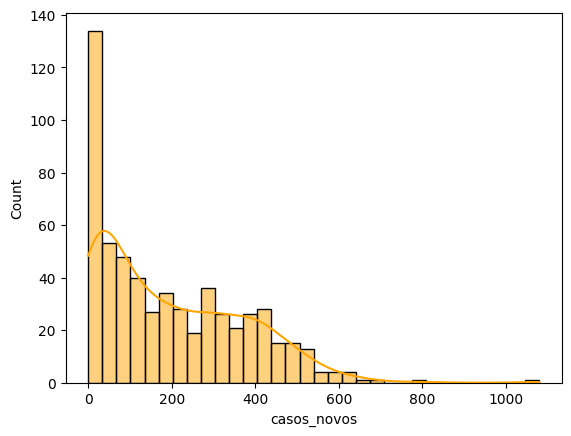

In [ ]:
import seaborn as sns
sns.histplot(covid_campinas, x= 'casos_novos', bins = 32, color = 'orange', kde = True , stat = 'count');

### QQPlot

In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt

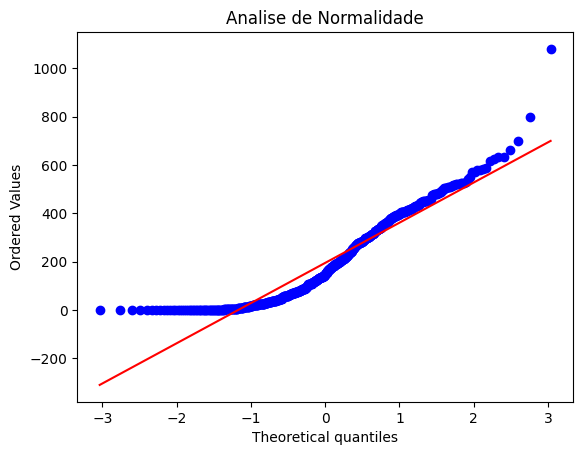

In [ ]:
stats.probplot(covid_campinas['casos_novos'], dist = 'norm', plot = plt);
plt.title('Analise de Normalidade');
plt.show()

### Teste Shapiro-Wilk

####CRITÉRIOS:
####NIVEL DE SIGNIFICÂNCIA DE 0,05 ou 5% (mais ultilizado)
####QUANDO p > 0,05 (distribuição normal)

In [ ]:
stats.shapiro(covid_campinas.casos_novos)

ShapiroResult(statistic=0.9063177511734449, pvalue=2.1793464670342813e-18)

In [ ]:
estatistica , p = stats.shapiro(covid_campinas.casos_novos)
print(f'Estatística = {estatistica}')
print(f'p-valor = {p}')

Estatística = 0.9063177511734449
p-valor = 2.1793464670342813e-18


### Teste Lilliefors(Kolmogorov-Sminorv)

In [ ]:
import statsmodels
from statsmodels.stats.diagnostic import lilliefors

In [ ]:
estatistica, p = statsmodels.stats.diagnostic.lilliefors(covid_campinas.casos_novos , dist = 'norm')
print(f'Estatística = {round(estatistica,2)}')
print(f'p-valor = {p}')

Estatística = 0.13
p-valor = 0.0009999999999998899


# Correlação Linear

## Gráficos de Dispersão

### Determinação da correlação
### "pearson" para dados parametricos(normalidade e homocedastidade)
### "spearman" (volume "grande de dados não paramétricos: maior ou igual a 30
### "kendall" (volume "pequeno" de dados parametricos: menor que 30


Text(0, 0.5, 'Óbitos')

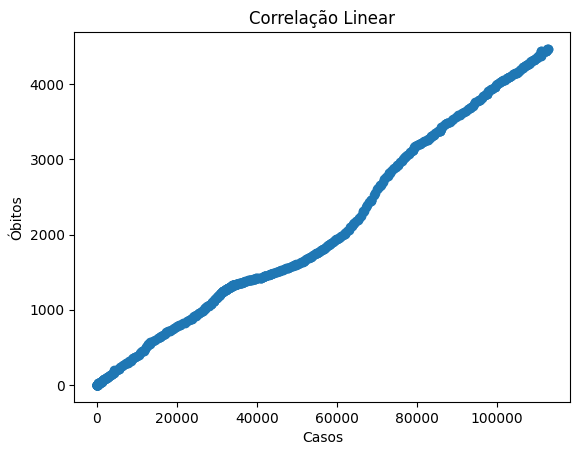

In [ ]:
plt.scatter(covid_campinas['casos'], covid_campinas['obitos'])
plt.title('Correlação Linear')
plt.xlabel('Casos')
plt.ylabel('Óbitos')

In [ ]:
df = covid_campinas[['casos_novos','obitos_novos','casos','obitos']]
df

,casos_novos,obitos_novos,casos,obitos
108,0,0,0,0
753,0,0,0,0
1398,0,0,0,0
2043,0,0,0,0
2688,0,0,0,0
...,...,...,...,...
370338,207,3,112492,4449
370983,132,12,112624,4461
371628,121,3,112745,4464
372273,28,3,112773,4467


### Normalidade

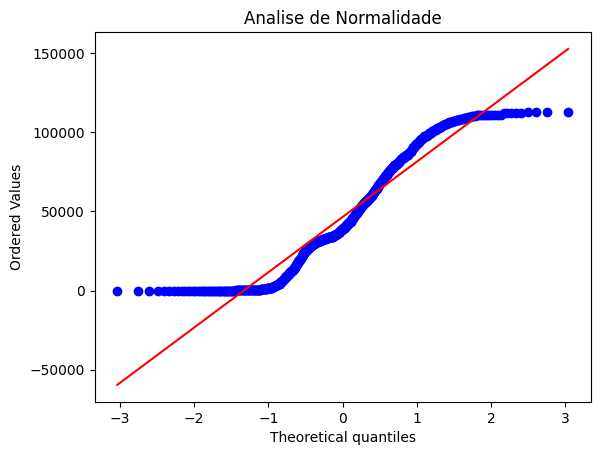

In [ ]:
stats.probplot(df['casos'], dist = 'norm', plot = plt);
plt.title('Analise de Normalidade');
plt.show()

In [ ]:
estatistica , p = stats.shapiro(covid_campinas['casos'])
print('valor estatistico = ',round(estatistica,2))
print('valor p = ',p)

valor estatistico =  0.92
valor p =  1.0124873233184613e-16


### Correlação linear

In [ ]:
correlacoes = df.corr(method = 'spearman')
correlacoes

,casos_novos,obitos_novos,casos,obitos
casos_novos,1.000000,0.795481,0.400064,0.400228
obitos_novos,0.795481,1.000000,0.357675,0.358285
casos,0.400064,0.357675,1.000000,0.999914
obitos,0.400228,0.358285,0.999914,1.000000


In [ ]:
import seaborn as sns

<Axes: >

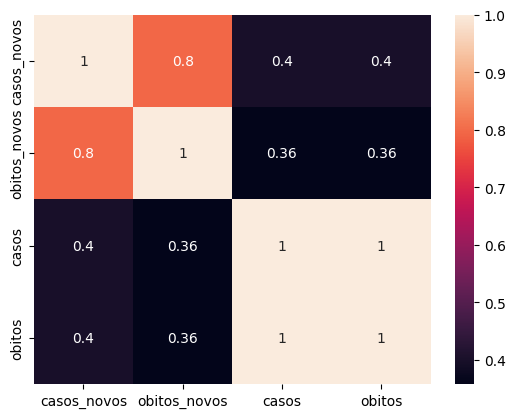

In [ ]:
plt.figure()
sns.heatmap(correlacoes, annot = True)

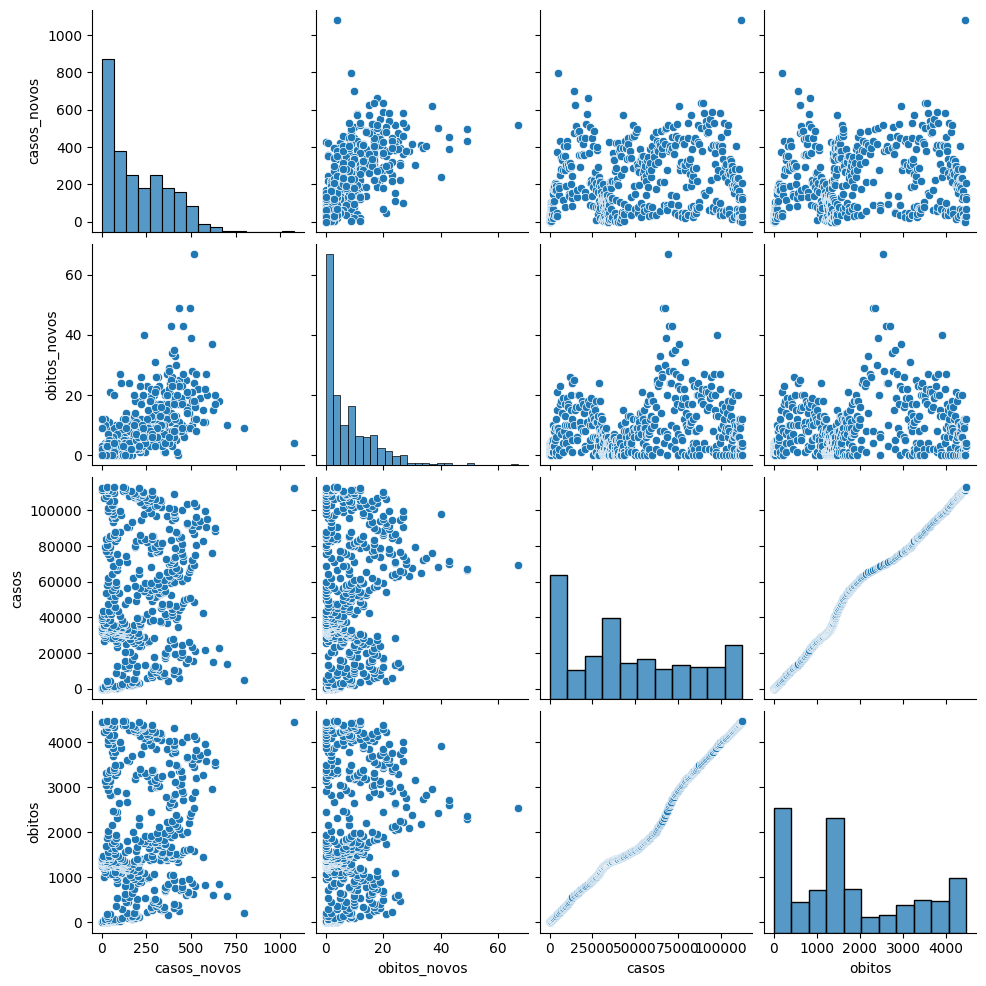

In [ ]:
sns.pairplot(df)

# Regressão Linear

In [ ]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sm

In [ ]:
regressao = smf.ols('obitos ~ casos', data = covid_campinas).fit()
print(regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                 obitos   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 5.866e+04
Date:                Tue, 18 Feb 2025   Prob (F-statistic):               0.00
Time:                        16:33:57   Log-Likelihood:                -3685.8
No. Observations:                 579   AIC:                             7376.
Df Residuals:                     577   BIC:                             7384.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -62.2464      9.546     -6.520      0.0

In [ ]:
coefs = pd.DataFrame(regressao.params)
coefs.columns = ['Coeficientes']
coefs

,Coeficientes
Intercept,-62.246395
casos,0.039218


<ipython-input-85-7707a5482bb5>:3: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



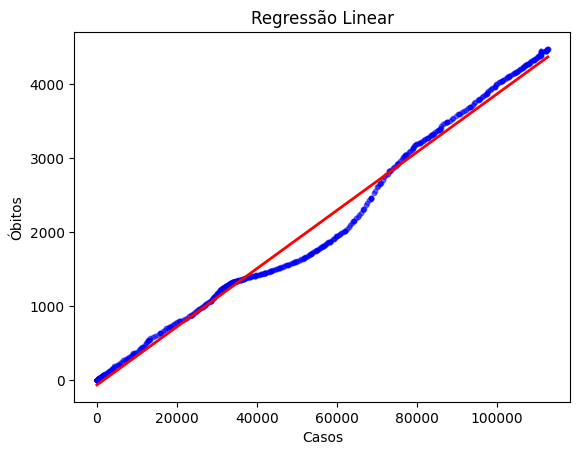

In [ ]:
plt.scatter(y = covid_campinas['obitos'], x = covid_campinas['casos'], color = 'blue', s = 10 , alpha = 0.5)
x_plot = np.linspace(min(covid_campinas.casos), max(covid_campinas.casos), len(covid_campinas.obitos))
plt.plot(x_plot, regressao.params[0] + regressao.params[1]*x_plot, color = 'red', linewidth = 2)
plt.title('Regressão Linear')
plt.xlabel('Casos')
plt.ylabel('Óbitos')
plt.show()